![python logo](https://www.gbgplc.com/media/ejhedsjh/transaction-fraud-social-1.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
df.tail()

step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

In [5]:
df.shape

(6362620, 11)

In [6]:
df.size

69988820

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
oldbalanceDest        1.000000        0.976569 -0.005885       -0.000513  
newbalanceDest        0.976569        1.000000  0.000535       -0.000529  
isFraud              -0.005885        0.000535  1.000000        0.044109  
isFlaggedFraud       -0.000513       -0.000529  0.044109        1.000000

In [13]:
df.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [14]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

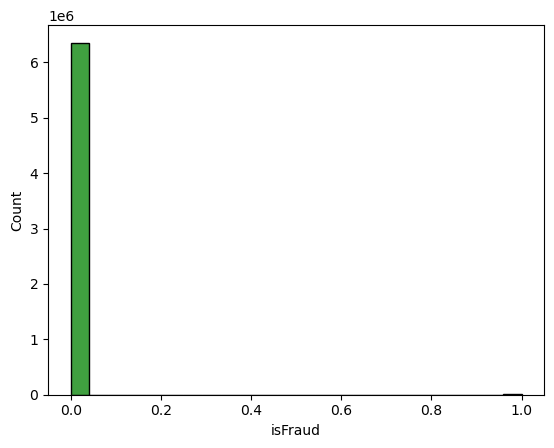

In [16]:
sns.histplot(x=df['isFraud'],color='green',bins='auto')
plt.savefig("isfraud.png")
plt.show()

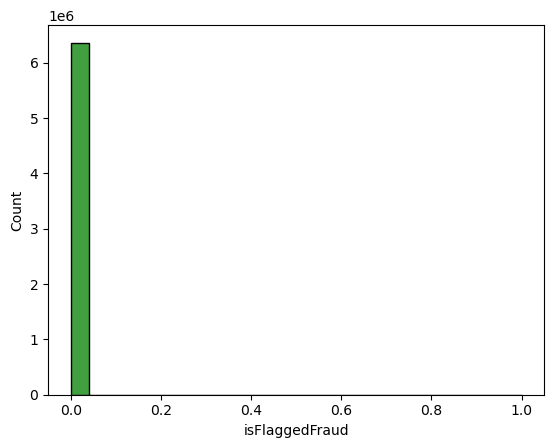

In [17]:
sns.histplot(x=df['isFlaggedFraud'],color='green',bins='auto')
plt.savefig("isflaggedfraud.png")
plt.show()

In [18]:
df['balanceOrg']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDest']=df['oldbalanceDest']-df['newbalanceDest']
df.drop(['oldbalanceDest','oldbalanceOrg','newbalanceOrig','newbalanceDest'],axis=1,inplace=True)

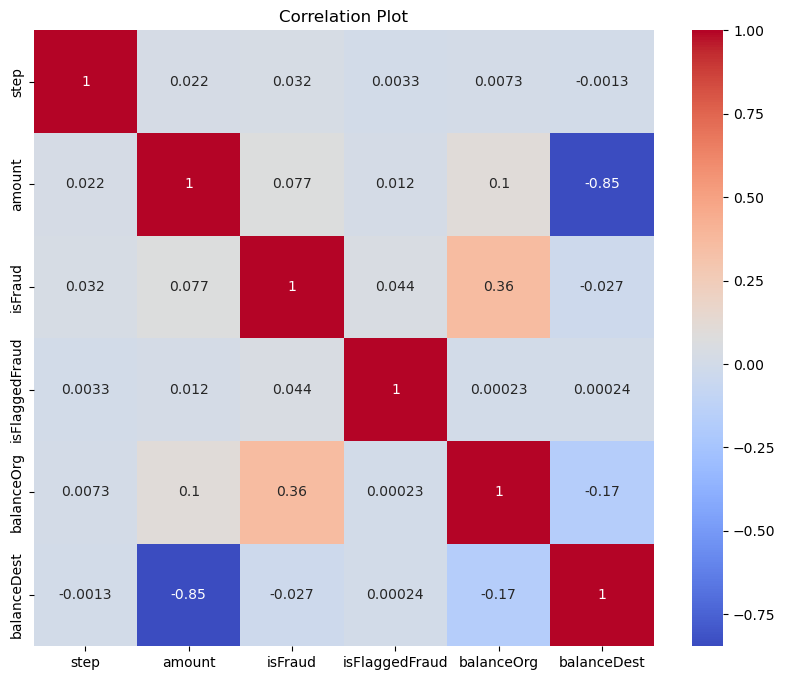

In [19]:
# Select the independent variables of interest
ind_col= ['step','amount', 'isFraud','isFlaggedFraud','balanceOrg','balanceDest']

# Create a correlation matrix
corr_matrix = df[ind_col].corr()

# Generate a correlation plot (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

# Set plot title
plt.title('Correlation Plot')
plt.savefig("correlation plot.png")
# Display the plot
plt.show()

step


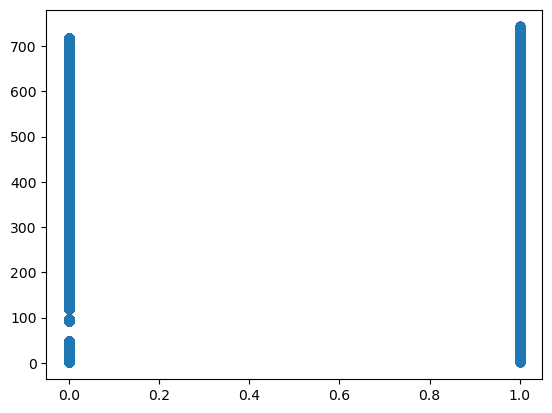

amount


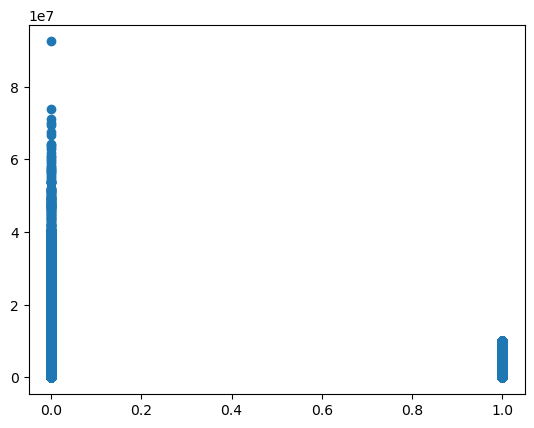

balanceOrg


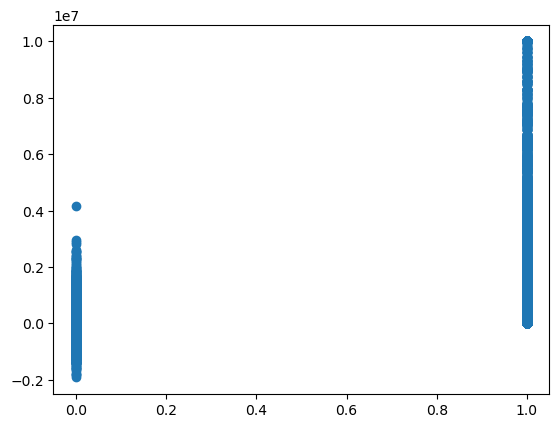

balanceDest


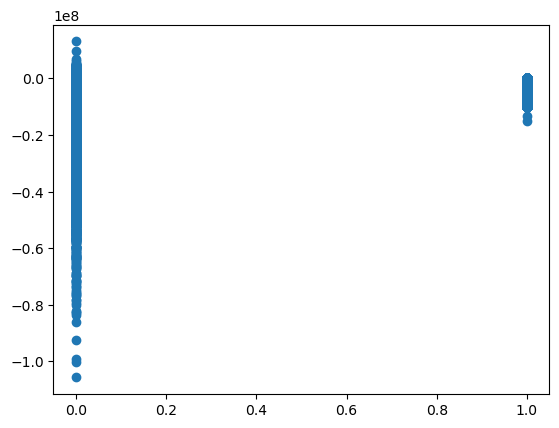

In [20]:
#creating a scatter plot for specified columns
col=['step',  'amount', 'balanceOrg', 'balanceDest']
for i in col:
    print(i)
    plt.scatter(df['isFraud'],df[i])
    plt.savefig("scatter.png")
    plt.show()

step


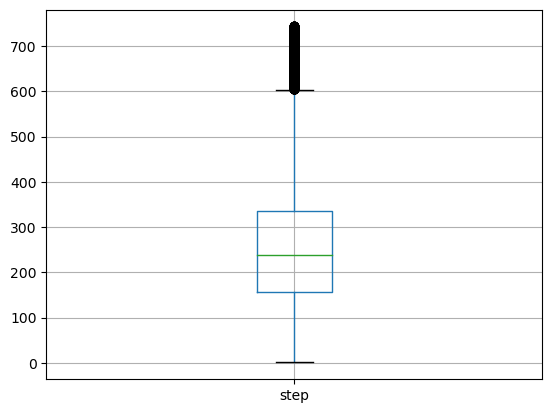

amount


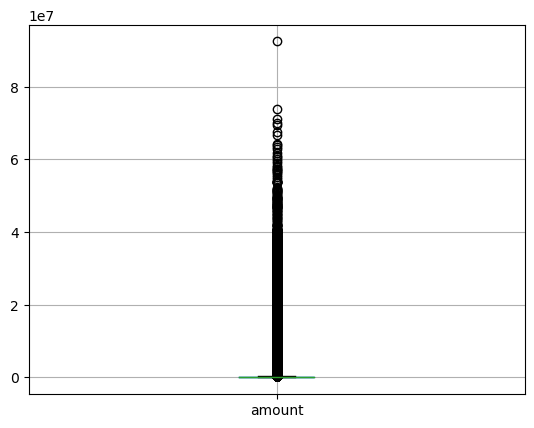

balanceOrg


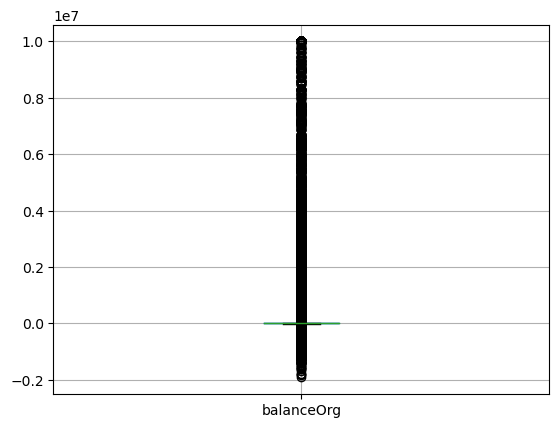

balanceDest


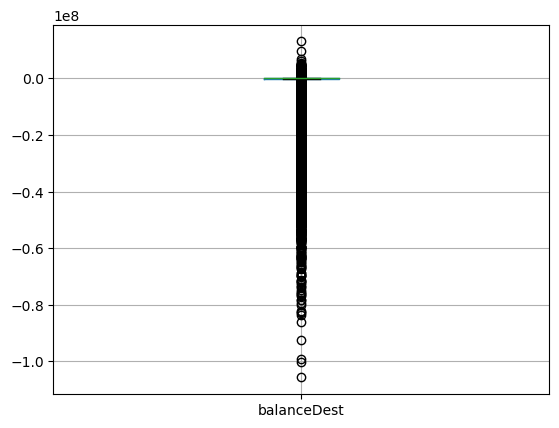

In [25]:
#creating a boxplot
col=['step',  'amount', 'balanceOrg', 'balanceDest']
for i in col:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        print(i)
        df.boxplot(column = i)
        plt.show()
    else:
        pass

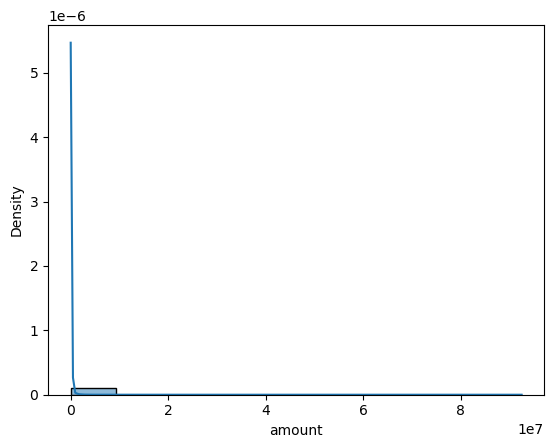

In [26]:
sns.histplot(df['amount'], kde=True,bins=10,stat='density')
plt.savefig("density.png")
plt.show()

In [27]:
# Data Preprocessing
#checking for outliers
numerical_columns = ['step','amount','balanceOrg','balanceDest']

In [28]:
# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}
for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify potential outliers using the IQR method
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) |
                (df[col] > (Q3 + 1.5 * IQR)))
     # Count the number of outliers for the current column
    num_outliers = outliers.sum()
    
    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'balanceOrg': 2139299
Number of outliers in column 'balanceDest': 886695


In [29]:
df = pd.get_dummies(df, columns=['type'])

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['nameOrig'] = labelencoder.fit_transform(df['nameOrig'])
df['nameDest'] = labelencoder.fit_transform(df['nameDest'])

In [31]:
# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [32]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [35]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [36]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred) *100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 99.43388101128151
Precision: 0.00017901897601145723
Recall: 0.0006172839506172839
F1 Score: 0.0002775464890369137
ROC AUC: 0.4981113871079072
Confusion Matrix:
[[1265319    5585]
 [   1619       1]]


In [38]:
model.score(X_train_scaled,y_train) *100

99.92544344939664

In [39]:
model.score(X_test_scaled,y_test) * 100

99.9205515966693

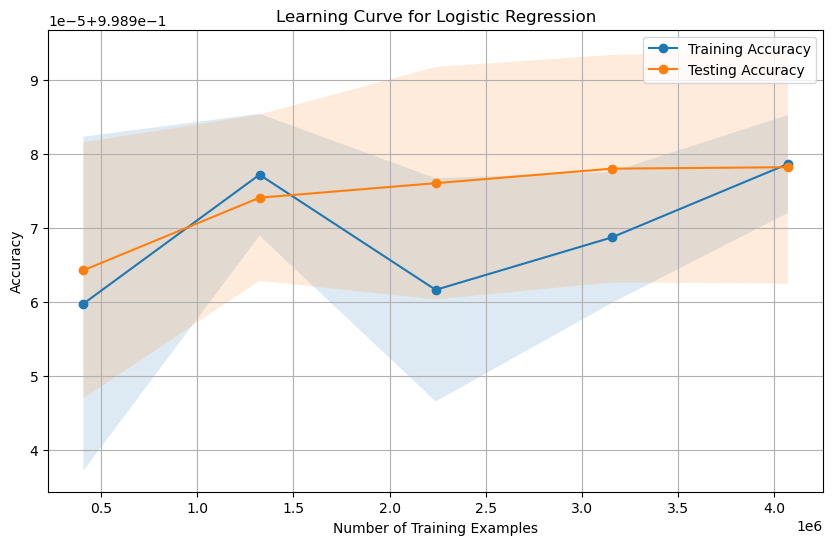

In [40]:
from sklearn.model_selection import learning_curve
# Generate a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.savefig("Learning Curve for Logistic Regression.png")
plt.show()

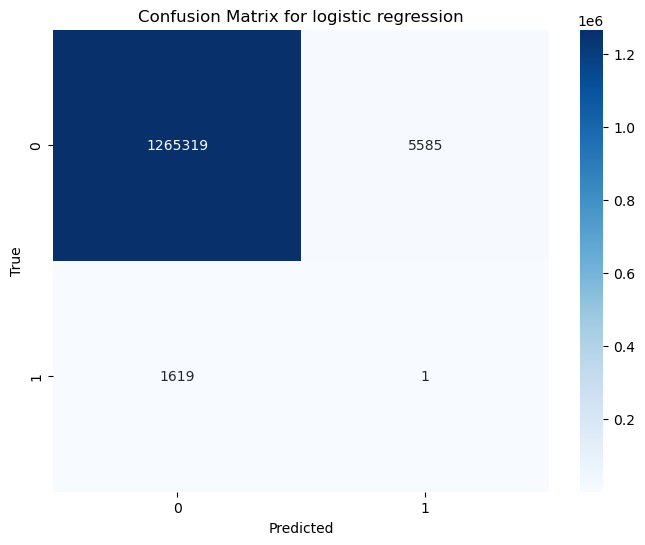

In [41]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for logistic regression')
plt.savefig("Confusion Matrix for logistic regression.png")
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier# Create a KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.5f}%")

Accuracy: 99.91702%
